In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

In [4]:
from transformers import (
    GPT2Config,
    GPT2Tokenizer,
    GPT2LMHeadModel,
)


In [5]:
modelname = '../models/pretrained/gpt2-large/'
config = GPT2Config.from_pretrained(modelname)
tokenizer = GPT2Tokenizer.from_pretrained(modelname)

### Mscl

In [2]:
file = '../data/results/single_sentences_I_1/round1_ends.txt'
f = open(file, "r")
sentences = f.readlines()
sentences = np.array([s.replace('\n','') for s in sentences])
rewards =  np.array([float(s.split('r=')[-1]) for s in sentences])

In [3]:
starts_w_I = np.array([True if s[0]=='I' else False for s in sentences])
starts_w_You = np.array([True if s[0:3]=='You' else False for s in sentences])
starts_w_I_am = np.array([True if s[0:4]=='I am' else False for s in sentences])
starts_w_You_are = np.array([True if s[0:7]=='You are' else False for s in sentences])
#sentences[starts_w_You_are]

In [14]:
len(sentences[starts_w_I])

2940

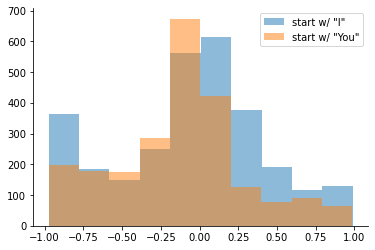

In [53]:
plt.hist(rewards[starts_w_I], alpha=0.5, label='start w/ "I"')
plt.hist(rewards[starts_w_You], alpha=0.5, label='start w/ "You"')
plt.legend()
sns.despine()

In [22]:
sentences[starts_w_I_am]

array(['I am so stupid to have this failed. r=-0.975',
       'I am seriously frustrated. r=-0.959',
       'I am having trouble with my food. r=-0.957',
       'I am angry and hurt, she wrote. r=-0.950',
       'I am not capable of even watching a movie or two. r=-0.937',
       'I am not interested. r=-0.915',
       'I am here to be disappointed. r=-0.897', 'I am in pain. r=-0.897',
       'I am not making it. r=-0.890',
       'I am done living a life of mediocrity. r=-0.873',
       'I am very anxious, even before I start the exam. r=-0.849',
       'I am not as capable as I was. r=-0.813', 'I am scared. r=-0.810',
       'I am lazy. r=-0.781',
       'I am not expecting the test to pass easily for you. r=-0.709',
       'I am not your mother. r=-0.528', 'I am not a computer. r=-0.428',
       'I am not that tough. r=-0.378',
       'I am working on my throat. r=-0.230', 'I am on a diet. r=-0.162',
       'I am in the bathroom waiting. r=-0.106',
       'I am standing at your door

(array([14.,  1.,  2.,  2.,  4.,  6.,  4.,  2.,  0.,  5.]),
 array([-0.975 , -0.7791, -0.5832, -0.3873, -0.1914,  0.0045,  0.2004,
         0.3963,  0.5922,  0.7881,  0.984 ]),
 <BarContainer object of 10 artists>)

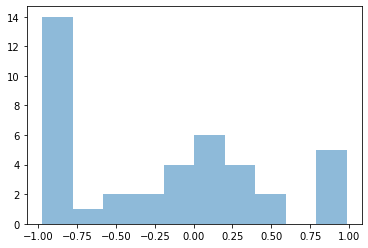

In [15]:
plt.hist(rewards[starts_w_I_am], alpha=0.5, label='start w/ "I am"')
#plt.hist(rewards[starts_w_You_are], alpha=0.5, label='start w/ "You are"')
#plt.legend()
#sns.despine()

In [85]:

model = GPT2LMHeadModel.from_pretrained(modelname)
device='cpu'

In [13]:
i = 0
print(sentences[starts_w_I_am][i])
example_sentence = sentences[starts_w_I_am][i].split('r=')[i].strip()
print(example_sentence)

I am so stupid to have this failed. r=-0.975
I am so stupid to have this failed.


In [11]:
tokenizer(example_sentence)

{'input_ids': [40, 716, 523, 8531, 284, 423, 428, 4054, 13], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}

### Testing "I am"

In [71]:
### I am 

import sys
sys.path.append('../')
from rl_learner import TD_Learner
import torch
import pickle

In [135]:
epoch=195
hidden_dim =50
filename=f'../data/results/single_sentences_I_1/quantile_learner_linear_I_am/log_quantile_learner_epoch{epoch}.pkl'
filename=f'../data/results/single_sentences_I_1/quantile_learner_50_I_am/log_quantile_learner_epoch{epoch}.pkl'






In [136]:
#Z_network = TD_Learner(config.n_embd, n_quantiles)
Z_network = TD_Learner(config.n_embd, n_quantiles, hidden_dim=hidden_dim)

Z_network.load_state_dict(torch.load(filename.replace('log_',''),
                                    map_location=torch.device('cpu')))

<All keys matched successfully>

In [137]:
for param in Z_network.parameters():
    print(param.shape)

torch.Size([50, 1280])
torch.Size([50])
torch.Size([5, 50])
torch.Size([5])


In [139]:
1280*50

64000

In [140]:
log = pickle.load(open(filename,'rb'))
loss = np.array(log['loss'])
epoch = np.array(log['epoch'])

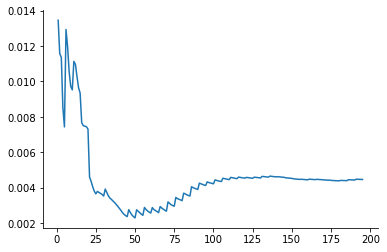

In [141]:
plt.plot(epoch, loss)
sns.despine()

In [142]:
##config

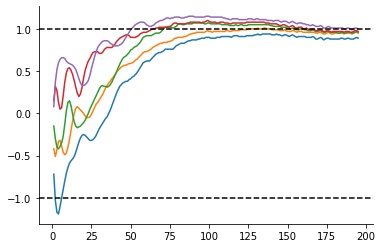

In [143]:
plt.plot(epoch, np.array(log['I am amazing and a great speaker.']))
sns.despine()
plt.axhline(y=-1, color='k', linestyle='--')
plt.axhline(y=1, color='k', linestyle='--')

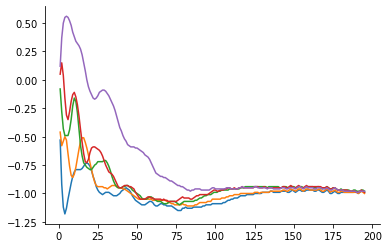

In [144]:
plt.plot(epoch, np.array(log['I am so stupid to have this failed.']))
sns.despine()

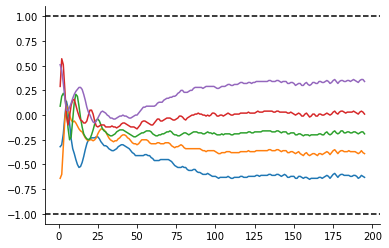

In [145]:
plt.plot(epoch, np.array(log['I am']))
sns.despine()
plt.axhline(y=-1, color='k', linestyle='--')
plt.axhline(y=1, color='k', linestyle='--')

In [146]:
n_quantiles = 5
taus = (2 * np.arange(n_quantiles) + 1) / (2.0 * n_quantiles)
taus

array([0.1, 0.3, 0.5, 0.7, 0.9])

In [147]:
thetas = [np.quantile(rewards[starts_w_I_am].squeeze(), q) for q in taus]
print(np.array(thetas).round(2))
print(np.array(log['I am'])[-1,])

[-0.94 -0.81 -0.13  0.17  0.8 ]
[-0.63 -0.39 -0.19  0.01  0.34]


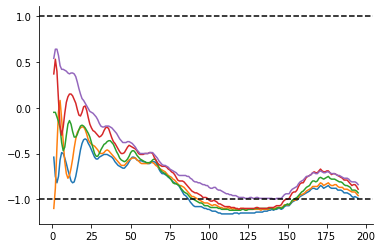

In [148]:
plt.plot(epoch, np.array(log['I am so stupid']))
sns.despine()
plt.axhline(y=-1, color='k', linestyle='--')
plt.axhline(y=1, color='k', linestyle='--')

In [149]:
example = 'I am not'
inputs = tokenizer(example, return_tensors='pt').to(device)
with torch.no_grad():
    output = model(input_ids=inputs['input_ids'],
                   attention_mask=inputs['attention_mask'],
                   output_hidden_states=True)
    states = output['hidden_states'][-1]
    theta_hats = Z_network(states).detach().cpu().numpy().round(2)
    theta_hats_last = theta_hats[:,-1,:].squeeze()
print(theta_hats_last)
sel = np.array([s.startswith(example) for s in sentences]).astype('bool')
thetas = [np.quantile(rewards[sel].squeeze(), q) for q in taus]
print(thetas)

[-0.76 -0.66 -0.56 -0.46 -0.19]
[-0.9194, -0.8592, -0.709, -0.468, -0.24139999999999986]


### Testing "I"

In [180]:
### I am 

import sys
sys.path.append('../')
from rl_learner import TD_Learner
import torch
import pickle

In [182]:
epoch=200
hidden_dim =100
filename=f'../data/results/single_sentences_I_1/quantile_learner_100_I/log_quantile_learner_epoch{epoch}.pkl'

In [183]:
#Z_network = TD_Learner(config.n_embd, n_quantiles)
Z_network = TD_Learner(config.n_embd, n_quantiles, hidden_dim=hidden_dim)

Z_network.load_state_dict(torch.load(filename.replace('log_',''),
                                    map_location=torch.device('cpu')))

<All keys matched successfully>

In [184]:
for param in Z_network.parameters():
    print(param.shape)

torch.Size([100, 1280])
torch.Size([100])
torch.Size([5, 100])
torch.Size([5])


In [185]:
#1280*100

In [186]:
log = pickle.load(open(filename,'rb'))
loss = np.array(log['loss'])
epoch = np.array(log['epoch'])

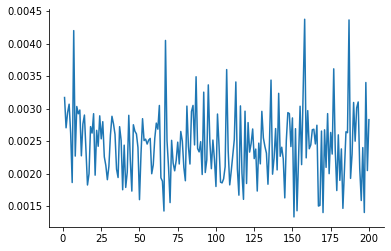

In [187]:
plt.plot(epoch, loss)
sns.despine()

In [188]:
##config

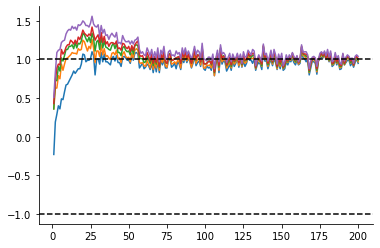

In [189]:
plt.plot(epoch, np.array(log['I am amazing and a great speaker.']))
sns.despine()
plt.axhline(y=-1, color='k', linestyle='--')
plt.axhline(y=1, color='k', linestyle='--')

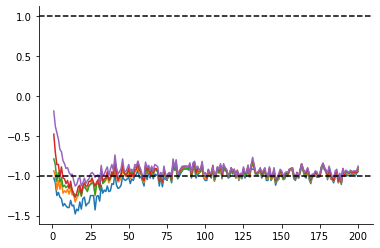

In [190]:
plt.plot(epoch, np.array(log['I am so stupid to have this failed.']))
sns.despine()
plt.axhline(y=-1, color='k', linestyle='--')
plt.axhline(y=1, color='k', linestyle='--')

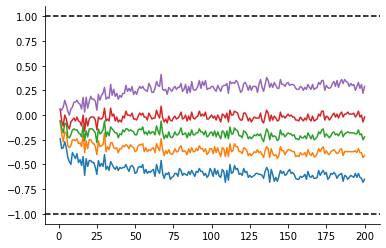

In [191]:
plt.plot(epoch, np.array(log['I am']))
sns.despine()
plt.axhline(y=-1, color='k', linestyle='--')
plt.axhline(y=1, color='k', linestyle='--')

In [192]:
n_quantiles = 5
taus = (2 * np.arange(n_quantiles) + 1) / (2.0 * n_quantiles)
taus

array([0.1, 0.3, 0.5, 0.7, 0.9])

In [193]:
thetas = [np.quantile(rewards[starts_w_I_am].squeeze(), q) for q in taus]
print(np.array(thetas).round(2))
print(np.array(log['I am'])[-1,])

[-0.94 -0.81 -0.13  0.17  0.8 ]
[-0.65 -0.41 -0.22 -0.02  0.29]


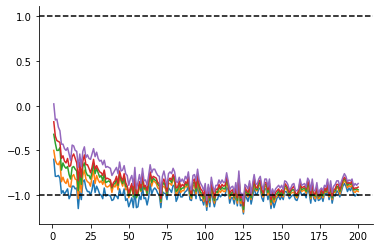

In [194]:
plt.plot(epoch, np.array(log['I am so stupid']))
sns.despine()
plt.axhline(y=-1, color='k', linestyle='--')
plt.axhline(y=1, color='k', linestyle='--')

In [195]:
example = 'I am not'
inputs = tokenizer(example, return_tensors='pt').to(device)
with torch.no_grad():
    output = model(input_ids=inputs['input_ids'],
                   attention_mask=inputs['attention_mask'],
                   output_hidden_states=True)
    states = output['hidden_states'][-1]
    theta_hats = Z_network(states).detach().cpu().numpy().round(2)
    theta_hats_last = theta_hats[:,-1,:].squeeze()
print(theta_hats_last)
sel = np.array([s.startswith(example) for s in sentences]).astype('bool')
thetas = [np.quantile(rewards[sel].squeeze(), q) for q in taus]
print(thetas)

[-0.79 -0.64 -0.53 -0.39 -0.16]
[-0.9194, -0.8592, -0.709, -0.468, -0.24139999999999986]


In [196]:
example = 'I am very'
inputs = tokenizer(example, return_tensors='pt').to(device)
with torch.no_grad():
    output = model(input_ids=inputs['input_ids'],
                   attention_mask=inputs['attention_mask'],
                   output_hidden_states=True)
    states = output['hidden_states'][-1]
    theta_hats = Z_network(states).detach().cpu().numpy().round(2)
    theta_hats_last = theta_hats[:,-1,:].squeeze()
print(theta_hats_last)
sel = np.array([s.startswith(example) for s in sentences]).astype('bool')
thetas = [np.quantile(rewards[sel].squeeze(), q) for q in taus]
print(thetas)

[-0.77 -0.73 -0.71 -0.68 -0.62]
[-0.849, -0.849, -0.849, -0.849, -0.849]


### Testing all

In [4]:
import sys
sys.path.append('../')
from rl_learner import TD_Learner
import torch
import pickle
device = 'cpu'

#### load data 

In [6]:
file = '../data/results/single_sentences_IYou_1/round1_ends.txt'
f = open(file, "r")
sentences = f.readlines()
sentences = np.array([s.replace('\n','') for s in sentences])
rewards =  np.array([float(s.split('r=')[-1]) for s in sentences])

In [7]:
len(sentences)

7400

In [8]:
sel = np.array([s.startswith("I don't know how to skate") for s in sentences]).astype('bool')
print(sel.sum())
np.array(sentences)[sel]

1


array(["I don't know how to skate. r=-0.887"], dtype='<U120')

In [9]:
np.where(sel==1)

(array([404]),)

#### logs 

In [19]:
epoch=200
hidden_dim =100
n_quantiles = 5
filename=f'../data/results/single_sentences_IYou_1/quantile_learner_100/log_quantile_learner_epoch{epoch}.pkl'

In [20]:
#Z_network = TD_Learner(config.n_embd, n_quantiles)
Z_network = TD_Learner(config.n_embd, n_quantiles, hidden_dim=hidden_dim)

Z_network.load_state_dict(torch.load(filename.replace('log_',''),
                                    map_location=torch.device('cpu')))

<All keys matched successfully>

In [21]:
for param in Z_network.parameters():
    print(param.shape)

torch.Size([100, 1280])
torch.Size([100])
torch.Size([5, 100])
torch.Size([5])


In [28]:
n_quantiles = 5
taus = (2 * np.arange(n_quantiles) + 1) / (2.0 * n_quantiles)
taus

array([0.1, 0.3, 0.5, 0.7, 0.9])

In [23]:
log = pickle.load(open(filename,'rb'))
loss = np.array(log['loss'])
epoch = np.array(log['epoch'])

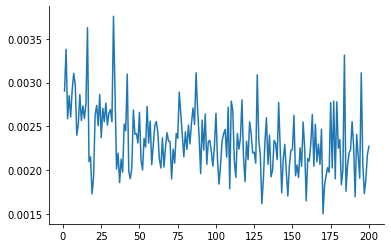

In [24]:
plt.plot(epoch, loss)
sns.despine()

[0.984, 0.984, 0.984, 0.984, 0.984]
[-0.975, -0.975, -0.975, -0.975, -0.975]
[-0.975, -0.975, -0.975, -0.975, -0.975]
[-0.9383, -0.8109000000000001, -0.134, 0.1702, 0.8001]


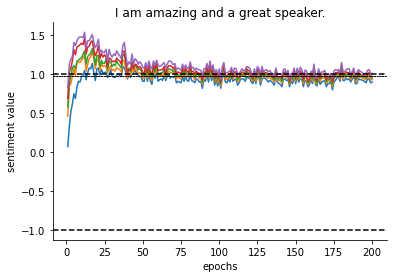

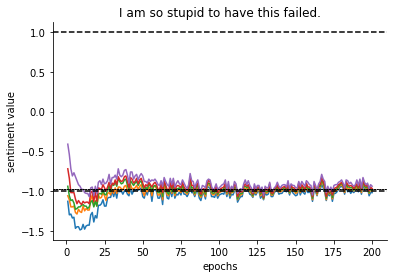

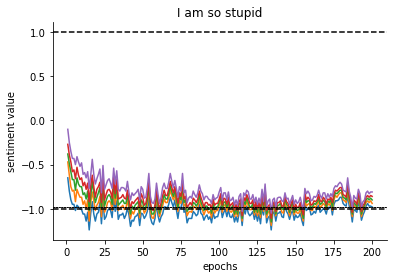

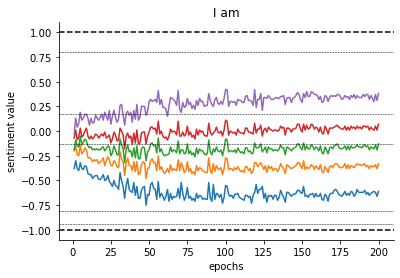

In [33]:
for example in ['I am amazing and a great speaker.','I am so stupid to have this failed.', 'I am so stupid', 'I am']:

    plt.figure()
    plt.plot(epoch, np.array(log[example]))
    sns.despine()
    plt.axhline(y=-1, color='k', linestyle='--')
    plt.axhline(y=1, color='k', linestyle='--')
    plt.ylabel('sentiment value')
    plt.xlabel('epochs')
    plt.title(example)

    sel = np.array([s.startswith(example) for s in sentences]).astype('bool')
    thetas = [np.quantile(rewards[sel].squeeze(), q) for q in taus]
    print(thetas)
    for theta in thetas:
            plt.axhline(y=theta, linestyle='--', color='k', linewidth=0.5)

#### gpt model 

In [35]:
model = GPT2LMHeadModel.from_pretrained(modelname)
device='cpu'

#### examples from training set

In [36]:
example = 'I am not'
inputs = tokenizer(example, return_tensors='pt').to(device)
with torch.no_grad():
    output = model(input_ids=inputs['input_ids'],
                   attention_mask=inputs['attention_mask'],
                   output_hidden_states=True)
    states = output['hidden_states'][-1]
    theta_hats = Z_network(states).detach().cpu().numpy().round(2)
    theta_hats_last = theta_hats[:,-1,:].squeeze()
print(theta_hats_last)

sel = np.array([s.startswith(example) for s in sentences]).astype('bool')
thetas = [np.quantile(rewards[sel].squeeze(), q) for q in taus]
print(thetas)

[-0.76 -0.57 -0.44 -0.29 -0.06]
[-0.9194, -0.8592, -0.709, -0.468, -0.24139999999999986]


In [25]:
example = 'I am very'
inputs = tokenizer(example, return_tensors='pt').to(device)
with torch.no_grad():
    output = model(input_ids=inputs['input_ids'],
                   attention_mask=inputs['attention_mask'],
                   output_hidden_states=True)
    states = output['hidden_states'][-1]
    theta_hats = Z_network(states).detach().cpu().numpy().round(2)
    theta_hats_last = theta_hats[:,-1,:].squeeze()
print(theta_hats_last)

sel = np.array([s.startswith(example) for s in sentences]).astype('bool')
thetas = [np.quantile(rewards[sel].squeeze(), q) for q in taus]
print(thetas)

[-0.1   0.02  0.09  0.13  0.2   0.25  0.31  0.38  0.48  0.66]
[-0.849, -0.849, -0.849, -0.849, -0.849, -0.849, -0.849, -0.849, -0.849, -0.849]


#### examples not in training set

In [38]:
example = 'I am awesome'
inputs = tokenizer(example, return_tensors='pt').to(device)
with torch.no_grad():
    output = model(input_ids=inputs['input_ids'],
                   attention_mask=inputs['attention_mask'],
                   output_hidden_states=True)
    states = output['hidden_states'][-1]
    theta_hats = Z_network(states).detach().cpu().numpy().round(2)
    theta_hats_last = theta_hats[:,-1,:].squeeze()
print(theta_hats_last)

sel = np.array([s.startswith(example) for s in sentences]).astype('bool')
sel.sum()
# thetas = [np.quantile(rewards[sel].squeeze(), q) for q in taus
# print(thetas)

[0.59 0.63 0.67 0.71 0.76]


0

In [40]:
example = 'I am not'
inputs = tokenizer(example, return_tensors='pt').to(device)
with torch.no_grad():
    output = model(input_ids=inputs['input_ids'],
                   attention_mask=inputs['attention_mask'],
                   output_hidden_states=True)
    states = output['hidden_states'][-1]
    theta_hats = Z_network(states).detach().cpu().numpy().round(2)
    theta_hats_last = theta_hats[:,-1,:].squeeze()
print(theta_hats_last)

sel = np.array([s.startswith(example) for s in sentences]).astype('bool')
sel.sum()
# thetas = [np.quantile(rewards[sel].squeeze(), q) for q in taus
# print(thetas)

[-0.76 -0.57 -0.44 -0.29 -0.06]


9

In [43]:
example = 'This is not very'
inputs = tokenizer(example, return_tensors='pt').to(device)
with torch.no_grad():
    output = model(input_ids=inputs['input_ids'],
                   attention_mask=inputs['attention_mask'],
                   output_hidden_states=True)
    states = output['hidden_states'][-1]
    theta_hats = Z_network(states).detach().cpu().numpy().round(2)
    theta_hats_last = theta_hats[:,-1,:].squeeze()
print(theta_hats_last)

sel = np.array([s.startswith(example) for s in sentences]).astype('bool')
sel.sum()
# thetas = [np.quantile(rewards[sel].squeeze(), q) for q in taus
# print(thetas)

[-1.46 -1.41 -1.37 -1.33 -1.27]


0

In [45]:
example = 'This is very'
inputs = tokenizer(example, return_tensors='pt').to(device)
with torch.no_grad():
    output = model(input_ids=inputs['input_ids'],
                   attention_mask=inputs['attention_mask'],
                   output_hidden_states=True)
    states = output['hidden_states'][-1]
    theta_hats = Z_network(states).detach().cpu().numpy().round(2)
    theta_hats_last = theta_hats[:,-1,:].squeeze()
print(theta_hats_last)

sel = np.array([s.startswith(example) for s in sentences]).astype('bool')
sel.sum()
# thetas = [np.quantile(rewards[sel].squeeze(), q) for q in taus
# print(thetas)

[-0.66 -0.6  -0.56 -0.52 -0.46]


0

In [41]:
example = 'I am not awesome'
inputs = tokenizer(example, return_tensors='pt').to(device)
with torch.no_grad():
    output = model(input_ids=inputs['input_ids'],
                   attention_mask=inputs['attention_mask'],
                   output_hidden_states=True)
    states = output['hidden_states'][-1]
    theta_hats = Z_network(states).detach().cpu().numpy().round(2)
    theta_hats_last = theta_hats[:,-1,:].squeeze()
print(theta_hats_last)

sel = np.array([s.startswith(example) for s in sentences]).astype('bool')
sel.sum()
# thetas = [np.quantile(rewards[sel].squeeze(), q) for q in taus
# print(thetas)

[-0.52 -0.46 -0.42 -0.38 -0.31]


0

In [37]:
example = 'I am not going to fail.'
inputs = tokenizer(example, return_tensors='pt').to(device)
with torch.no_grad():
    output = model(input_ids=inputs['input_ids'],
                   attention_mask=inputs['attention_mask'],
                   output_hidden_states=True)
    states = output['hidden_states'][-1]
    theta_hats = Z_network(states).detach().cpu().numpy().round(2)
    theta_hats_last = theta_hats[:,-1,:].squeeze()
print(theta_hats_last)

sel = np.array([s.startswith(example) for s in sentences]).astype('bool')
sel.sum()
# thetas = [np.quantile(rewards[sel].squeeze(), q) for q in taus
# print(thetas)

[-0.06 -0.03 -0.01  0.01  0.03]


0

In [38]:
example = 'I am not going to win.'
inputs = tokenizer(example, return_tensors='pt').to(device)
with torch.no_grad():
    output = model(input_ids=inputs['input_ids'],
                   attention_mask=inputs['attention_mask'],
                   output_hidden_states=True)
    states = output['hidden_states'][-1]
    theta_hats = Z_network(states).detach().cpu().numpy().round(2)
    theta_hats_last = theta_hats[:,-1,:].squeeze()
print(theta_hats_last)

sel = np.array([s.startswith(example) for s in sentences]).astype('bool')
sel.sum()
# thetas = [np.quantile(rewards[sel].squeeze(), q) for q in taus
# print(thetas)

[-1.02 -1.   -0.98 -0.95 -0.92]


0

In [39]:
example = 'I am going to win.'
inputs = tokenizer(example, return_tensors='pt').to(device)
with torch.no_grad():
    output = model(input_ids=inputs['input_ids'],
                   attention_mask=inputs['attention_mask'],
                   output_hidden_states=True)
    states = output['hidden_states'][-1]
    theta_hats = Z_network(states).detach().cpu().numpy().round(2)
    theta_hats_last = theta_hats[:,-1,:].squeeze()
print(theta_hats_last)

sel = np.array([s.startswith(example) for s in sentences]).astype('bool')
sel.sum()
# thetas = [np.quantile(rewards[sel].squeeze(), q) for q in taus
# print(thetas)

[0.77 0.8  0.83 0.86 0.9 ]


0

In [49]:
example = 'Without his help, I'
inputs = tokenizer(example, return_tensors='pt').to(device)
with torch.no_grad():
    output = model(input_ids=inputs['input_ids'],
                   attention_mask=inputs['attention_mask'],
                   output_hidden_states=True)
    states = output['hidden_states'][-1]
    theta_hats = Z_network(states).detach().cpu().numpy().round(2)
    theta_hats_last = theta_hats[:,-1,:].squeeze()
print(theta_hats_last)

sel = np.array([s.startswith(example) for s in sentences]).astype('bool')
sel.sum()
# thetas = [np.quantile(rewards[sel].squeeze(), q) for q in taus
# print(thetas)

[-0.33 -0.26 -0.22 -0.17 -0.11]


0

In [48]:
example = 'With his help, I'
inputs = tokenizer(example, return_tensors='pt').to(device)
with torch.no_grad():
    output = model(input_ids=inputs['input_ids'],
                   attention_mask=inputs['attention_mask'],
                   output_hidden_states=True)
    states = output['hidden_states'][-1]
    theta_hats = Z_network(states).detach().cpu().numpy().round(2)
    theta_hats_last = theta_hats[:,-1,:].squeeze()
print(theta_hats_last)

sel = np.array([s.startswith(example) for s in sentences]).astype('bool')
sel.sum()
# thetas = [np.quantile(rewards[sel].squeeze(), q) for q in taus
# print(thetas)

[0.96 1.02 1.07 1.11 1.17]


0

In [50]:
example = 'Despite not having his help, I'
inputs = tokenizer(example, return_tensors='pt').to(device)
with torch.no_grad():
    output = model(input_ids=inputs['input_ids'],
                   attention_mask=inputs['attention_mask'],
                   output_hidden_states=True)
    states = output['hidden_states'][-1]
    theta_hats = Z_network(states).detach().cpu().numpy().round(2)
    theta_hats_last = theta_hats[:,-1,:].squeeze()
print(theta_hats_last)

sel = np.array([s.startswith(example) for s in sentences]).astype('bool')
sel.sum()
# thetas = [np.quantile(rewards[sel].squeeze(), q) for q in taus
# print(thetas)

[0.54 0.6  0.63 0.67 0.73]


0

In [51]:
example = 'Despite having his help, I'
inputs = tokenizer(example, return_tensors='pt').to(device)
with torch.no_grad():
    output = model(input_ids=inputs['input_ids'],
                   attention_mask=inputs['attention_mask'],
                   output_hidden_states=True)
    states = output['hidden_states'][-1]
    theta_hats = Z_network(states).detach().cpu().numpy().round(2)
    theta_hats_last = theta_hats[:,-1,:].squeeze()
print(theta_hats_last)

sel = np.array([s.startswith(example) for s in sentences]).astype('bool')
sel.sum()
# thetas = [np.quantile(rewards[sel].squeeze(), q) for q in taus
# print(thetas)

[0.5  0.57 0.63 0.68 0.75]


0

### Testing all - k =0.1

In [6]:
import sys
sys.path.append('../')
from rl_learner import TD_Learner
import torch
import pickle
device = 'cpu'

#### load data 

In [7]:
file = '../data/results/single_sentences_IYou_1/round1_ends.txt'
f = open(file, "r")
sentences = f.readlines()
sentences = np.array([s.replace('\n','') for s in sentences])
rewards =  np.array([float(s.split('r=')[-1]) for s in sentences])

In [8]:
len(sentences)

7400

In [9]:
sel = np.array([s.startswith("I don't know how to skate") for s in sentences]).astype('bool')
print(sel.sum())
np.array(sentences)[sel]

1


array(["I don't know how to skate. r=-0.887"], dtype='<U120')

In [10]:
np.where(sel==1)

(array([404]),)

#### logs 

In [13]:
epoch=95
hidden_dim =101
n_quantiles = 10
filename=f'../data/results/single_sentences_IYou_1/quantile_learner_101_0.1/log_quantile_learner_epoch{epoch}.pkl'

In [14]:
#Z_network = TD_Learner(config.n_embd, n_quantiles)
Z_network = TD_Learner(config.n_embd, n_quantiles, hidden_dim=hidden_dim)

Z_network.load_state_dict(torch.load(filename.replace('log_',''),
                                    map_location=torch.device('cpu')))

<All keys matched successfully>

In [15]:
for param in Z_network.parameters():
    print(param.shape)

torch.Size([101, 1280])
torch.Size([101])
torch.Size([10, 101])
torch.Size([10])


In [16]:
taus = (2 * np.arange(n_quantiles) + 1) / (2.0 * n_quantiles)
taus

array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95])

In [17]:
log = pickle.load(open(filename,'rb'))
loss = np.array(log['loss'])
epoch = np.array(log['epoch'])

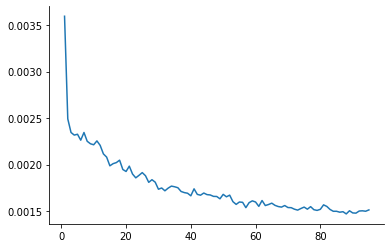

In [18]:
plt.plot(epoch, loss)
sns.despine()

[0.984, 0.984, 0.984, 0.984, 0.984, 0.984, 0.984, 0.984, 0.984, 0.984]
[-0.975, -0.975, -0.975, -0.975, -0.975, -0.975, -0.975, -0.975, -0.975, -0.975]
[-0.975, -0.975, -0.975, -0.975, -0.975, -0.975, -0.975, -0.975, -0.975, -0.975]
[-0.9571, -0.8997, -0.855, -0.7342000000000001, -0.2965999999999999, -0.042699999999999905, 0.14925000000000002, 0.3075, 0.4467499999999998, 0.9340499999999999]


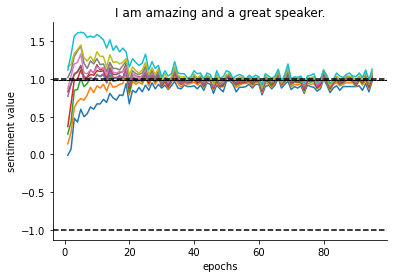

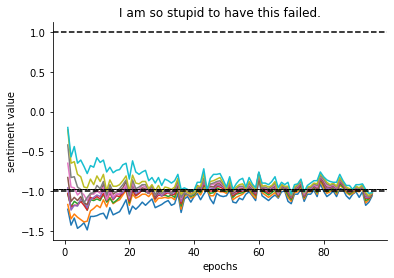

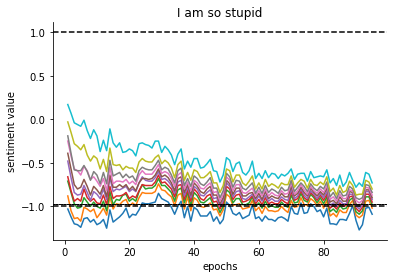

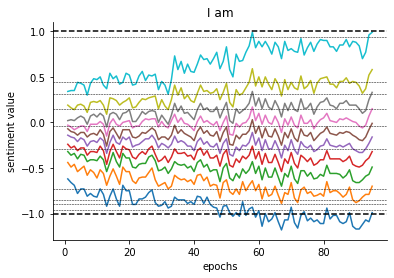

In [19]:
for example in ['I am amazing and a great speaker.','I am so stupid to have this failed.', 'I am so stupid', 'I am']:

    plt.figure()
    plt.plot(epoch, np.array(log[example]))
    sns.despine()
    plt.axhline(y=-1, color='k', linestyle='--')
    plt.axhline(y=1, color='k', linestyle='--')
    plt.ylabel('sentiment value')
    plt.xlabel('epochs')
    plt.title(example)

    sel = np.array([s.startswith(example) for s in sentences]).astype('bool')
    thetas = [np.quantile(rewards[sel].squeeze(), q) for q in taus]
    print(thetas)
    for theta in thetas:
            plt.axhline(y=theta, linestyle='--', color='k', linewidth=0.5)

#### gpt model 

In [20]:
model = GPT2LMHeadModel.from_pretrained(modelname)
device='cpu'

#### examples from training set

In [28]:
example = 'I am not'
inputs = tokenizer(example, return_tensors='pt').to(device)
with torch.no_grad():
    output = model(input_ids=inputs['input_ids'],
                   attention_mask=inputs['attention_mask'],
                   output_hidden_states=True)
    states = output['hidden_states'][-1]
    theta_hats = Z_network(states).detach().cpu().numpy().round(2)
    theta_hats_last = theta_hats[:,-1,:].squeeze()
print(theta_hats_last)

sel = np.array([s.startswith(example) for s in sentences]).astype('bool')
thetas = [np.quantile(rewards[sel].squeeze(), q) for q in taus]
print(np.round(thetas,2))

[-1.09 -0.9  -0.78 -0.67 -0.58 -0.49 -0.4  -0.3  -0.17  0.02]
[-0.93 -0.91 -0.89 -0.83 -0.75 -0.64 -0.51 -0.43 -0.39  0.03]


In [29]:
example = 'I am very'
inputs = tokenizer(example, return_tensors='pt').to(device)
with torch.no_grad():
    output = model(input_ids=inputs['input_ids'],
                   attention_mask=inputs['attention_mask'],
                   output_hidden_states=True)
    states = output['hidden_states'][-1]
    theta_hats = Z_network(states).detach().cpu().numpy().round(2)
    theta_hats_last = theta_hats[:,-1,:].squeeze()
print(theta_hats_last)

sel = np.array([s.startswith(example) for s in sentences]).astype('bool')
thetas = [np.quantile(rewards[sel].squeeze(), q) for q in taus]
print(np.round(thetas,2))

[-0.1   0.02  0.09  0.13  0.2   0.25  0.31  0.38  0.48  0.66]
[-0.85 -0.85 -0.85 -0.85 -0.85 -0.85 -0.85 -0.85 -0.85 -0.85]


#### examples not in training set

In [42]:
example = 'I am awesome'
inputs = tokenizer(example, return_tensors='pt').to(device)
with torch.no_grad():
    output = model(input_ids=inputs['input_ids'],
                   attention_mask=inputs['attention_mask'],
                   output_hidden_states=True)
    states = output['hidden_states'][-1]
    theta_hats = Z_network(states).detach().cpu().numpy().round(2)
    theta_hats_last = theta_hats[:,-1,:].squeeze()
print(theta_hats_last)

sel = np.array([s.startswith(example) for s in sentences]).astype('bool')
sel.sum()
# thetas = [np.quantile(rewards[sel].squeeze(), q) for q in taus
# print(thetas)

[0.36 0.45 0.5  0.54 0.57 0.6  0.63 0.67 0.73 0.82]


0

In [43]:
example = 'I am not'
inputs = tokenizer(example, return_tensors='pt').to(device)
with torch.no_grad():
    output = model(input_ids=inputs['input_ids'],
                   attention_mask=inputs['attention_mask'],
                   output_hidden_states=True)
    states = output['hidden_states'][-1]
    theta_hats = Z_network(states).detach().cpu().numpy().round(2)
    theta_hats_last = theta_hats[:,-1,:].squeeze()
print(theta_hats_last)

sel = np.array([s.startswith(example) for s in sentences]).astype('bool')
sel.sum()
# thetas = [np.quantile(rewards[sel].squeeze(), q) for q in taus
# print(thetas)

[-1.09 -0.9  -0.78 -0.67 -0.58 -0.49 -0.4  -0.3  -0.17  0.02]


9

In [44]:
example = 'This is not very'
inputs = tokenizer(example, return_tensors='pt').to(device)
with torch.no_grad():
    output = model(input_ids=inputs['input_ids'],
                   attention_mask=inputs['attention_mask'],
                   output_hidden_states=True)
    states = output['hidden_states'][-1]
    theta_hats = Z_network(states).detach().cpu().numpy().round(2)
    theta_hats_last = theta_hats[:,-1,:].squeeze()
print(theta_hats_last)

sel = np.array([s.startswith(example) for s in sentences]).astype('bool')
sel.sum()
# thetas = [np.quantile(rewards[sel].squeeze(), q) for q in taus
# print(thetas)

[-1.   -0.93 -0.9  -0.88 -0.85 -0.83 -0.8  -0.77 -0.72 -0.66]


0

In [45]:
example = 'This is very'
inputs = tokenizer(example, return_tensors='pt').to(device)
with torch.no_grad():
    output = model(input_ids=inputs['input_ids'],
                   attention_mask=inputs['attention_mask'],
                   output_hidden_states=True)
    states = output['hidden_states'][-1]
    theta_hats = Z_network(states).detach().cpu().numpy().round(2)
    theta_hats_last = theta_hats[:,-1,:].squeeze()
print(theta_hats_last)

sel = np.array([s.startswith(example) for s in sentences]).astype('bool')
sel.sum()
# thetas = [np.quantile(rewards[sel].squeeze(), q) for q in taus
# print(thetas)

[-0.47 -0.38 -0.34 -0.31 -0.28 -0.25 -0.21 -0.18 -0.12 -0.05]


0

In [46]:
example = 'I am not awesome'
inputs = tokenizer(example, return_tensors='pt').to(device)
with torch.no_grad():
    output = model(input_ids=inputs['input_ids'],
                   attention_mask=inputs['attention_mask'],
                   output_hidden_states=True)
    states = output['hidden_states'][-1]
    theta_hats = Z_network(states).detach().cpu().numpy().round(2)
    theta_hats_last = theta_hats[:,-1,:].squeeze()
print(theta_hats_last)

sel = np.array([s.startswith(example) for s in sentences]).astype('bool')
sel.sum()
# thetas = [np.quantile(rewards[sel].squeeze(), q) for q in taus
# print(thetas)

[-0.61 -0.53 -0.49 -0.46 -0.43 -0.4  -0.37 -0.34 -0.29 -0.22]


0

In [47]:
example = 'I am not going to fail.'
inputs = tokenizer(example, return_tensors='pt').to(device)
with torch.no_grad():
    output = model(input_ids=inputs['input_ids'],
                   attention_mask=inputs['attention_mask'],
                   output_hidden_states=True)
    states = output['hidden_states'][-1]
    theta_hats = Z_network(states).detach().cpu().numpy().round(2)
    theta_hats_last = theta_hats[:,-1,:].squeeze()
print(theta_hats_last)

sel = np.array([s.startswith(example) for s in sentences]).astype('bool')
sel.sum()
# thetas = [np.quantile(rewards[sel].squeeze(), q) for q in taus
# print(thetas)

[-0.2  -0.17 -0.14 -0.12 -0.11 -0.09 -0.08 -0.07 -0.06 -0.04]


0

In [48]:
example = 'I am not going to win.'
inputs = tokenizer(example, return_tensors='pt').to(device)
with torch.no_grad():
    output = model(input_ids=inputs['input_ids'],
                   attention_mask=inputs['attention_mask'],
                   output_hidden_states=True)
    states = output['hidden_states'][-1]
    theta_hats = Z_network(states).detach().cpu().numpy().round(2)
    theta_hats_last = theta_hats[:,-1,:].squeeze()
print(theta_hats_last)

sel = np.array([s.startswith(example) for s in sentences]).astype('bool')
sel.sum()
# thetas = [np.quantile(rewards[sel].squeeze(), q) for q in taus
# print(thetas)

[-1.19 -1.16 -1.14 -1.13 -1.13 -1.12 -1.12 -1.11 -1.11 -1.09]


0

In [49]:
example = 'I am going to win.'
inputs = tokenizer(example, return_tensors='pt').to(device)
with torch.no_grad():
    output = model(input_ids=inputs['input_ids'],
                   attention_mask=inputs['attention_mask'],
                   output_hidden_states=True)
    states = output['hidden_states'][-1]
    theta_hats = Z_network(states).detach().cpu().numpy().round(2)
    theta_hats_last = theta_hats[:,-1,:].squeeze()
print(theta_hats_last)

sel = np.array([s.startswith(example) for s in sentences]).astype('bool')
sel.sum()
# thetas = [np.quantile(rewards[sel].squeeze(), q) for q in taus
# print(thetas)

[0.39 0.42 0.44 0.46 0.47 0.49 0.5  0.52 0.54 0.59]


0

In [50]:
example = 'Without his help, I'
inputs = tokenizer(example, return_tensors='pt').to(device)
with torch.no_grad():
    output = model(input_ids=inputs['input_ids'],
                   attention_mask=inputs['attention_mask'],
                   output_hidden_states=True)
    states = output['hidden_states'][-1]
    theta_hats = Z_network(states).detach().cpu().numpy().round(2)
    theta_hats_last = theta_hats[:,-1,:].squeeze()
print(theta_hats_last)

sel = np.array([s.startswith(example) for s in sentences]).astype('bool')
sel.sum()
# thetas = [np.quantile(rewards[sel].squeeze(), q) for q in taus
# print(thetas)

[-0.53 -0.42 -0.36 -0.32 -0.28 -0.25 -0.21 -0.17 -0.12 -0.02]


0

In [51]:
example = 'With his help, I'
inputs = tokenizer(example, return_tensors='pt').to(device)
with torch.no_grad():
    output = model(input_ids=inputs['input_ids'],
                   attention_mask=inputs['attention_mask'],
                   output_hidden_states=True)
    states = output['hidden_states'][-1]
    theta_hats = Z_network(states).detach().cpu().numpy().round(2)
    theta_hats_last = theta_hats[:,-1,:].squeeze()
print(theta_hats_last)

sel = np.array([s.startswith(example) for s in sentences]).astype('bool')
sel.sum()
# thetas = [np.quantile(rewards[sel].squeeze(), q) for q in taus
# print(thetas)

[0.68 0.79 0.85 0.9  0.93 0.97 1.   1.04 1.09 1.17]


0

In [52]:
example = 'Despite not having his help, I'
inputs = tokenizer(example, return_tensors='pt').to(device)
with torch.no_grad():
    output = model(input_ids=inputs['input_ids'],
                   attention_mask=inputs['attention_mask'],
                   output_hidden_states=True)
    states = output['hidden_states'][-1]
    theta_hats = Z_network(states).detach().cpu().numpy().round(2)
    theta_hats_last = theta_hats[:,-1,:].squeeze()
print(theta_hats_last)

sel = np.array([s.startswith(example) for s in sentences]).astype('bool')
sel.sum()
# thetas = [np.quantile(rewards[sel].squeeze(), q) for q in taus
# print(thetas)

[0.67 0.77 0.82 0.85 0.89 0.92 0.96 0.99 1.04 1.12]


0

In [53]:
example = 'Despite having his help, I'
inputs = tokenizer(example, return_tensors='pt').to(device)
with torch.no_grad():
    output = model(input_ids=inputs['input_ids'],
                   attention_mask=inputs['attention_mask'],
                   output_hidden_states=True)
    states = output['hidden_states'][-1]
    theta_hats = Z_network(states).detach().cpu().numpy().round(2)
    theta_hats_last = theta_hats[:,-1,:].squeeze()
print(theta_hats_last)

sel = np.array([s.startswith(example) for s in sentences]).astype('bool')
sel.sum()
# thetas = [np.quantile(rewards[sel].squeeze(), q) for q in taus
# print(thetas)

[0.54 0.65 0.72 0.76 0.8  0.84 0.88 0.93 0.99 1.1 ]


0

### Generating Sentences (within distribution) using CVaR

In [52]:
import sys
sys.path.append('../')
from rl_learner import TD_Learner
import torch
import pickle
from cvar_helpers import calc_cvar_from_samples
device = 'cpu'

#### load full training data 

In [55]:
file = '../data/results/single_sentences_IYou_1/round1_ends.txt'
f = open(file, "r")
sentences = f.readlines()
sentences = np.array([s.replace('\n','') for s in sentences])
rewards =  np.array([float(s.split('r=')[-1]) for s in sentences])

In [56]:
len(sentences)

7400

#### load cvar generated sentences

In [57]:
sentences_cvar = {}
rewards_cvar = {}
alphas = [0.05, 0.2, 0.5, 0.75]
for alpha in alphas:

    file = f'../data/results/single_sentences_IYou_1/round1_ends_cvar_{alpha}.txt'
    f = open(file, "r")
    sentences_cvar[alpha] = np.array([s.replace('\n','') for s in f.readlines()])
    rewards_cvar[alpha] =  np.array([float(s.split('r=')[-1]) for s in sentences_cvar[alpha]])

#### Plot the distribution

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


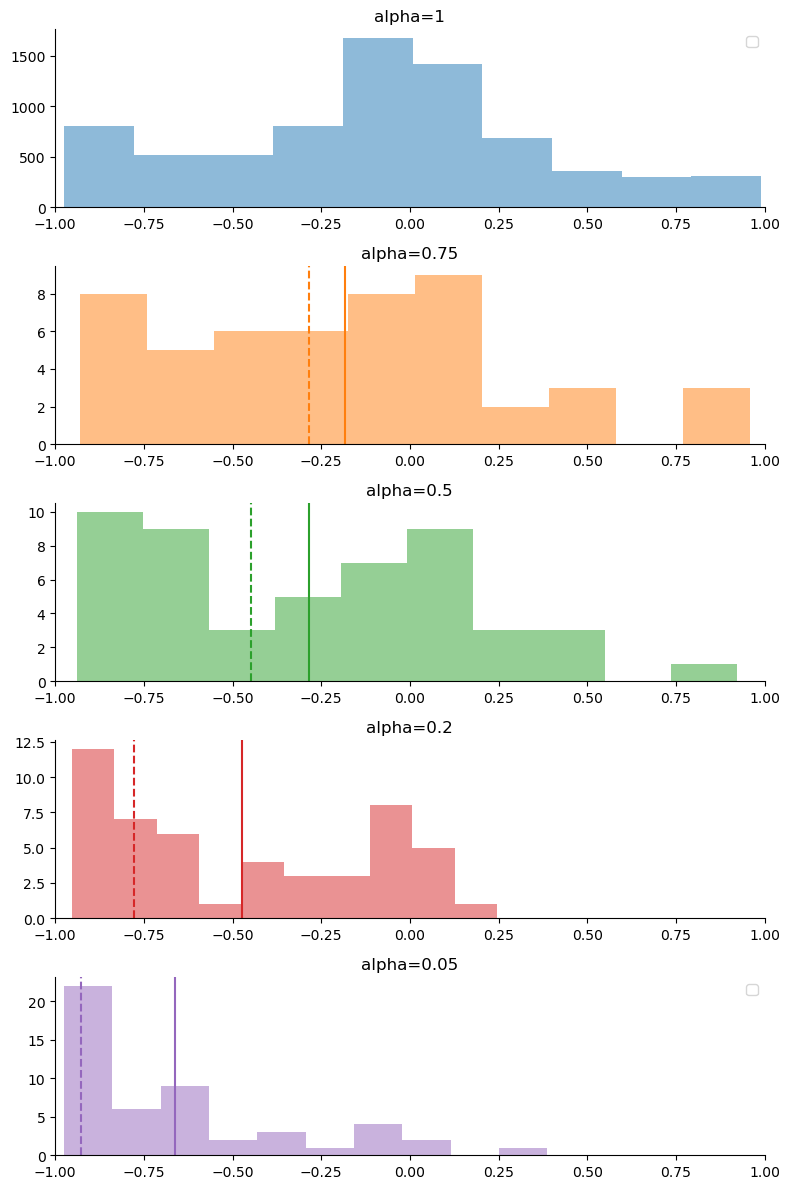

In [65]:
stem = ""
sel = np.array([s.startswith(stem) for s in sentences]).astype('bool')

fig,axes = plt.subplots(len(alphas)+1, 1, figsize=(8,3*len(alphas)), dpi=100)

plt.sca(axes[0])
plt.hist(rewards[sel], alpha=0.5, label=f'{stem}', density=False)
plt.legend()
sns.despine()
plt.xlim([-1,1])
plt.title(f'alpha=1')

for a, alpha in enumerate(alphas[::-1]):
    
    plt.sca(axes[a+1])    
    sel_cvar = np.array([s.startswith(stem) for s in sentences_cvar[alpha]]).astype('bool')

    plt.hist(rewards_cvar[alpha][sel_cvar], alpha=0.5, color=sns.color_palette()[a+1],
             label=f'{stem}',density=False)
    
    #plt.hist(np.sort(rewards[sel])[0:int(len(rewards[sel])*alpha)], alpha=0.25, color=sns.color_palette()[a+1],
    #         label=f'{stem}',density=False)
    
    
    _, cvar = calc_cvar_from_samples(rewards[sel], alpha)
    mean = np.mean(rewards_cvar[alpha][sel_cvar])
    plt.axvline(x=cvar, color=sns.color_palette()[a+1], linestyle='--')
    plt.axvline(x=mean, color=sns.color_palette()[a+1])
    plt.xlim([-1,1])
    plt.title(f'alpha={alpha}')
    
plt.legend()
plt.tight_layout()

#### Identical sentences?

In [43]:
sentences
for sentence in sentences_cvar[0.05]:
    if sentence not in sentences:
        print(sentence)

#### Plotting p-distributions and alphas

In [84]:
for alpha in [0.05]:

    file = f'../data/results/single_sentences_I_1/cvar_output_{alpha}.pkl'
    loaded = pickle.load(open(file,'rb'))
    alpha_storage = loaded['alphas']
    p_storage = loaded['p_storage']
    pd_storage = loaded['pd_storage']

Text(0.5, 0, 'position in sentence')

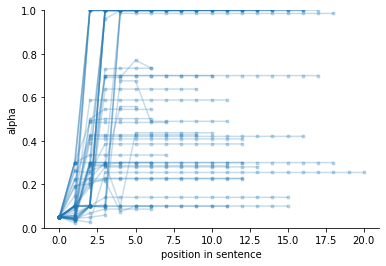

In [88]:
for i in range(len(alpha_storage)):
    plt.plot(alpha_storage[i], marker='.', alpha=0.25, color=sns.color_palette()[0])
sns.despine()
plt.ylim([0,1])
plt.ylabel('alpha')
plt.xlabel('position in sentence')

Text(0.5, 0, 'position in sentence')

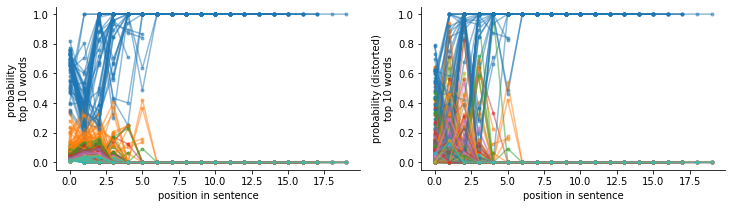

In [92]:
fig, axes = plt.subplots(1,2,figsize=(12,3))

plt.sca(axes[1])
for i in range(len(pd_storage)):
    plt.plot(np.array(pd_storage[i]), marker='.', alpha=0.5);
    sns.despine()
plt.ylabel('probability (distorted)\ntop 10 words')
plt.xlabel('position in sentence')

plt.sca(axes[0])
for i in range(len(p_storage)):
    plt.plot(np.array(p_storage[i]), marker='.', alpha=0.5);
    sns.despine()
plt.ylabel('probability \ntop 10 words')
plt.xlabel('position in sentence')

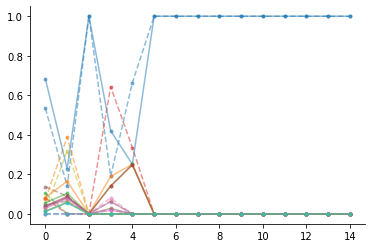

In [95]:
i = 0
plt.plot(np.array(pd_storage[i]), marker='.', alpha=0.5, linestyle='--');
plt.plot(np.array(p_storage[i]), marker='.', alpha=0.5);
sns.despine()


In [97]:
sentences_cvar[0.05][0]

'I am so stupid to have this failed. r=-0.975'

### Generating Sentences (out of distribution) using CVaR

In [67]:
import sys
sys.path.append('../')
from rl_learner import TD_Learner
import torch
import pickle
from cvar_helpers import calc_cvar_from_samples
device = 'cpu'

#### load full training data 

In [68]:
file = '../data/results/single_sentences_IYou_1/round1_ends.txt'
f = open(file, "r")
sentences = f.readlines()
sentences = np.array([s.replace('\n','') for s in sentences])
rewards =  np.array([float(s.split('r=')[-1]) for s in sentences])

In [69]:
len(sentences)

7400

#### load cvar generated sentences

In [70]:
sentences_cvar = {}
rewards_cvar = {}
alphas = [0.05, 0.2, 0.5, 0.75]
for alpha in alphas:

    file = f'../data/results/single_sentences_IYou_1/round1_ends_cvar_{alpha}_unres.txt'
    f = open(file, "r")
    sentences_cvar[alpha] = np.array([s.replace('\n','') for s in f.readlines()])
    rewards_cvar[alpha] =  np.array([float(s.split('r=')[-1]) for s in sentences_cvar[alpha]])

In [71]:
#sentences_cvar[alpha]

#### Plot the distribution

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


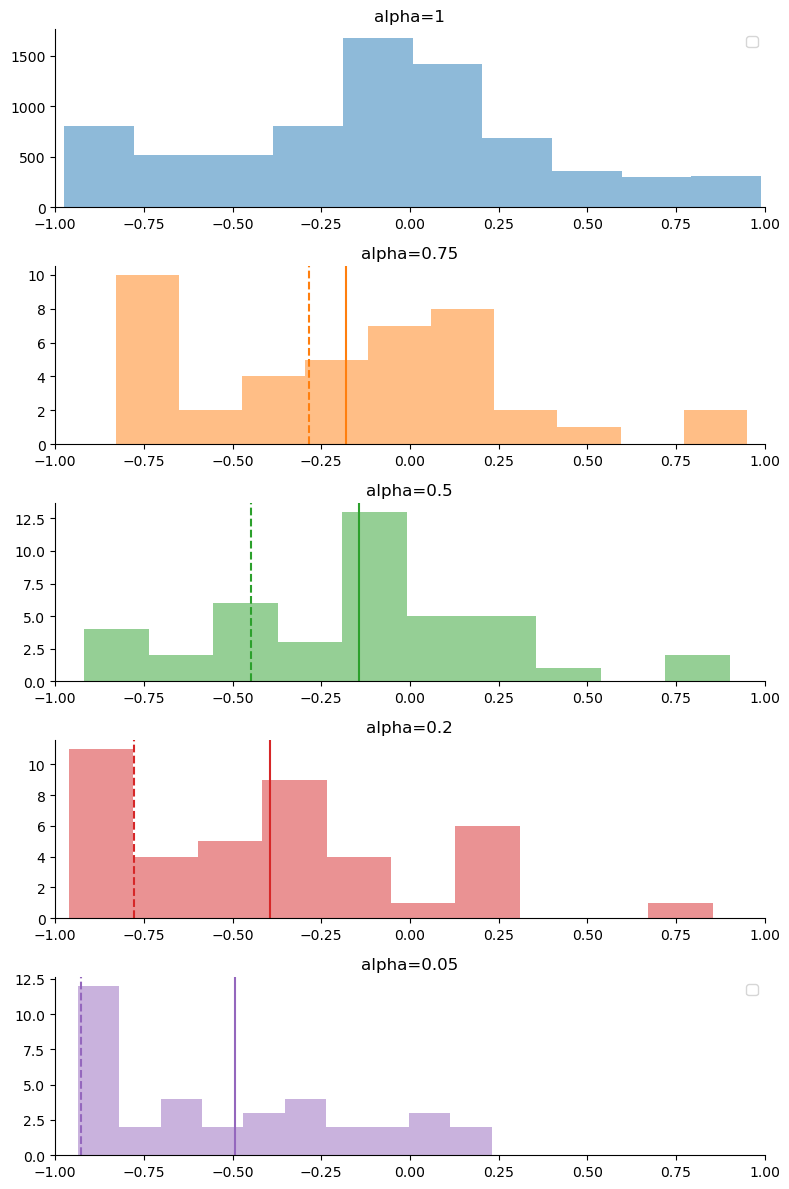

In [72]:
stem = ""
sel = np.array([s.startswith(stem) for s in sentences]).astype('bool')

fig,axes = plt.subplots(len(alphas)+1, 1, figsize=(8,3*len(alphas)), dpi=100)

plt.sca(axes[0])
plt.hist(rewards[sel], alpha=0.5, label=f'{stem}', density=False)
plt.legend()
sns.despine()
plt.xlim([-1,1])
plt.title(f'alpha=1')

for a, alpha in enumerate(alphas[::-1]):
    
    plt.sca(axes[a+1]) 
    sel_cvar = np.array([s.startswith(stem) for s in sentences_cvar[alpha]]).astype('bool')
    plt.hist(rewards_cvar[alpha][sel_cvar], alpha=0.5, color=sns.color_palette()[a+1],
             label=f'{stem}',density=False)
    
    _, cvar = calc_cvar_from_samples(rewards[sel], alpha)
    mean = np.mean(rewards_cvar[alpha][sel_cvar])
    plt.axvline(x=cvar, color=sns.color_palette()[a+1], linestyle='--')
    plt.axvline(x=mean, color=sns.color_palette()[a+1])
    plt.xlim([-1,1])
    plt.title(f'alpha={alpha}')
    
plt.legend()
plt.tight_layout()

#### Identical sentences?

In [73]:
sentences
for sentence in sentences_cvar[0.5]:
    if sentence not in sentences:
        print(sentence)

You might fail the rest of your tests. r=-0.918
You need to get out of here. r=-0.809
I'm not that smart. r=-0.756
And I might fail. r=-0.731
You didn't want to go to the doctor. r=-0.659
I'm not studying hard. r=-0.519
You are not a criminal. r=-0.516
I need an operation. r=-0.465
Your wife is pregnant. r=-0.424
They said, 'We're sorry you can't do it. r=-0.379
Your family is here and you don't think they would be. r=-0.309
I'm hungry. r=-0.254
You did homework. r=-0.185
It was still dark. r=-0.139
My doctor called the doctor. r=-0.139
I needed to study. r=-0.132
You have a doctor's appointment. r=-0.123
Your friend is having a baby. r=-0.115
And I had my daughter there, he said. r=-0.050
Yeah, I said. r=-0.043
You need to get to your desk to take it and you've got a meeting to get ready. r=-0.032
I need a new car. r=-0.032
I'm studying. r=-0.002
My test will probably be in the evening. r=0.025
And that's what I did. r=0.080
You've got to go to the gym. r=0.250
I did a lot. r=0.317
Th

#### Plotting p-distributions and alphas

In [74]:
for alpha in [0.05]:

    file = f'../data/results/single_sentences_IYou_1/cvar_output_{alpha}_unres.pkl'
    loaded = pickle.load(open(file,'rb'))
    alpha_storage = loaded['alphas']
    p_storage = loaded['p_storage']
    pd_storage = loaded['pd_storage']

Text(0.5, 0, 'position in sentence')

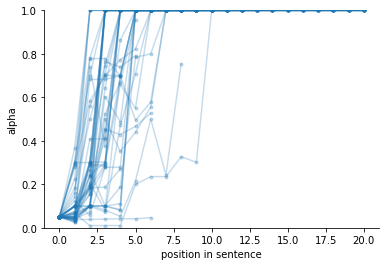

In [75]:
for i in range(len(alpha_storage)):
    plt.plot(alpha_storage[i], marker='.', alpha=0.25, color=sns.color_palette()[0])
sns.despine()
plt.ylim([0,1])
plt.ylabel('alpha')
plt.xlabel('position in sentence')

Text(0.5, 0, 'position in sentence')

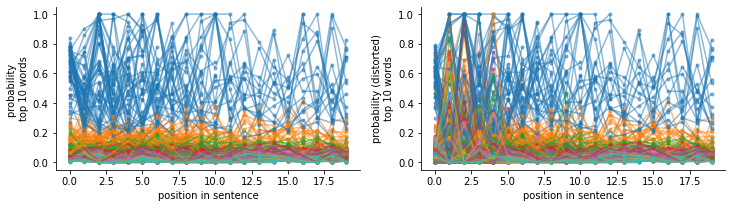

In [76]:
fig, axes = plt.subplots(1,2,figsize=(12,3))

plt.sca(axes[1])
for i in range(len(pd_storage)):
    plt.plot(np.array(pd_storage[i]), marker='.', alpha=0.5);
    sns.despine()
plt.ylabel('probability (distorted)\ntop 10 words')
plt.xlabel('position in sentence')

plt.sca(axes[0])
for i in range(len(p_storage)):
    plt.plot(np.array(p_storage[i]), marker='.', alpha=0.5);
    sns.despine()
plt.ylabel('probability \ntop 10 words')
plt.xlabel('position in sentence')

Maybe the test was wrong, maybe you're not sick enough. r=-0.936
0Maybe 1the 2test 3was 4wrong 5, 6maybe 7you 8're 9not 10sick 11enough 12. 13r 14=- 150 16. 179 1836


Text(0.5, 1.0, "Maybe the test was wrong, maybe you're not sick enough. r=-0.936")

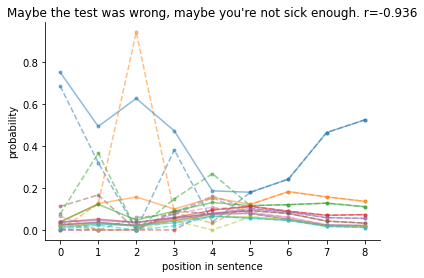

In [86]:
i = 0
plt.plot(np.array(pd_storage[i]), marker='.', alpha=0.5, linestyle='--', label='distorted');
plt.plot(np.array(p_storage[i]), marker='.', alpha=0.5, label='undistorted');
sns.despine()
print(sentences_cvar[alpha][i])
print((' '.join([str(i)+t.replace('Ġ','') for i,t in enumerate(tokenizer.tokenize(sentences_cvar[alpha][i]))])))
plt.xlabel('position in sentence')
plt.ylabel('probability')
plt.title(sentences_cvar[alpha][i])
#plt.legend()

And I might have a heart attack and die. r=-0.929
And I might have a heart attack and die . r =- 0 . 9 29


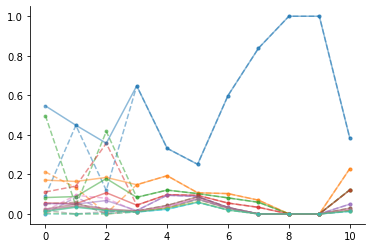

In [139]:
i = 1
plt.plot(np.array(pd_storage[i]), marker='.', alpha=0.5, linestyle='--');
plt.plot(np.array(p_storage[i]), marker='.', alpha=0.5);
sns.despine()
print(sentences_cvar[0.05][i])
print((' '.join([t.replace('Ġ','') for t in tokenizer.tokenize(sentences_cvar[0.05][i])])))